# DTSA 5510: Unsupervised Algorithms in Machine Learning Final Project

# 1. Introduction
The purpose of this analysis is to investigate factors affecting defect rates in a manufacturing process and to predict defect status using various machine learning methods. This report will cover exploratory data analysis (EDA), unsupervised learning techniques such as Singular Value Decomposition (SVD) and Non-negative Matrix Factorization (NMF), and supervised learning models including Logistic Regression, Decision Trees, and Random Forests. Dataset used in this project is retrieved from Kaggle website: https://www.kaggle.com/datasets/rabieelkharoua/predicting-manufacturing-defects-dataset/data.

# 2. Exploratory Data Analysis (EDA)
In this section, I will explore the dataset to understand its structure, summary statistics, and correlations between different features. This helps in identifying patterns, outliers, and relationships within the data. The dataset consists of various metrics related to the manufacturing process, including production volume, cost, quality scores, defect rates, and more. According to the outputs, there are 3240 entries and 17 columns. Initial inspection shows no missing values.

In [1]:
# Impport libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, NMF, TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.stats import mode

In [2]:
data = pd.read_csv("manufacturing_defect_dataset.csv")
print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.514504     90.350550                 1            2.464923   
3    0.638524     67.628690                 8            4.692476   
4    3.867784     82.728334                 9            2.746726   

   InventoryTurnover  StockoutRate  WorkerProductivity  SafetyIncidents  \
0           8.630515      0.081322           85.042379                0   
1       

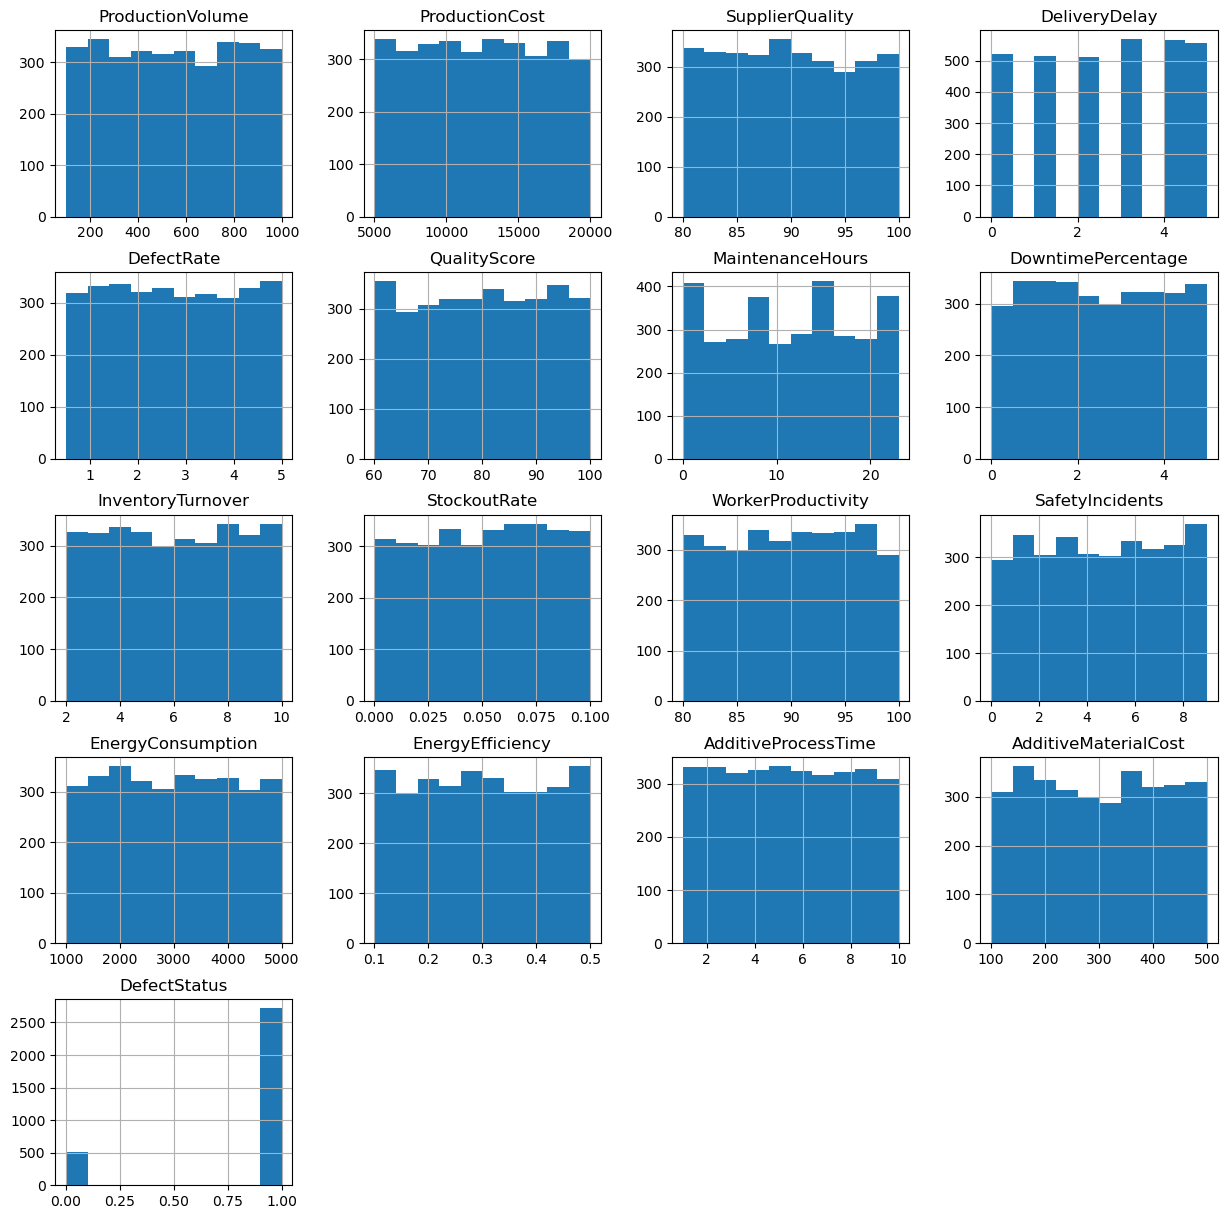

In [3]:
# Histograms
data.hist(figsize=(15, 15))
plt.show()

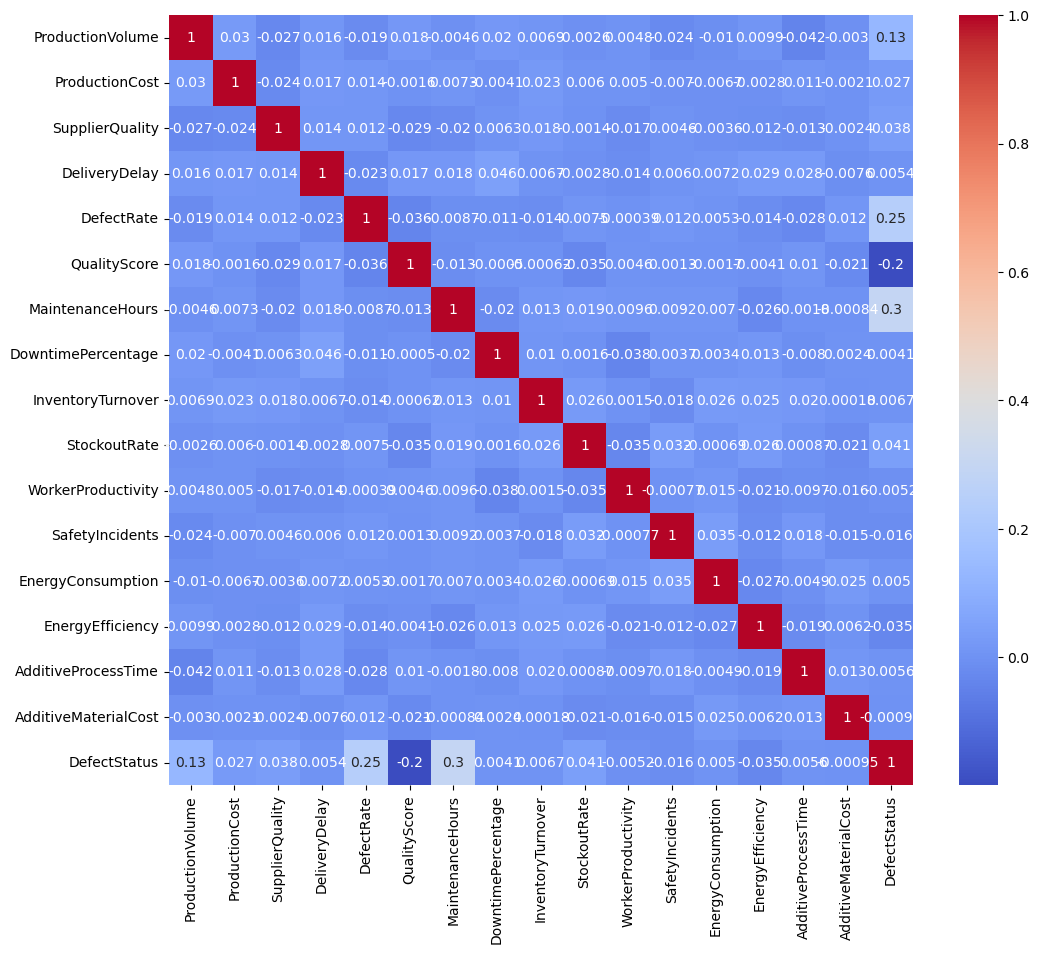

In [4]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

# 3. Unsupervised Learning
In this section, I will apply the unsupervised machine learning algorithms to the dataset. I will use SVD for dimensionality reduction first and then apply K-means clustering to identify patterns in the reduced data. The accuracy of the clustering will be evaluated by comparing the clusters with the actual defect status. Then Non-negative Matrix Factorization was used to reduce the dimensionality of the data. Similar to SVD, I will apply NMF to the data and then use K-means clustering to analyze the patterns.

C:\Users\Cecile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Cecile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
C:\Users\Cecile\AppData\Local\Temp\ipykernel_81780\2200467375.py:17: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

SVD Method Accuracy: 0.8404320987654321


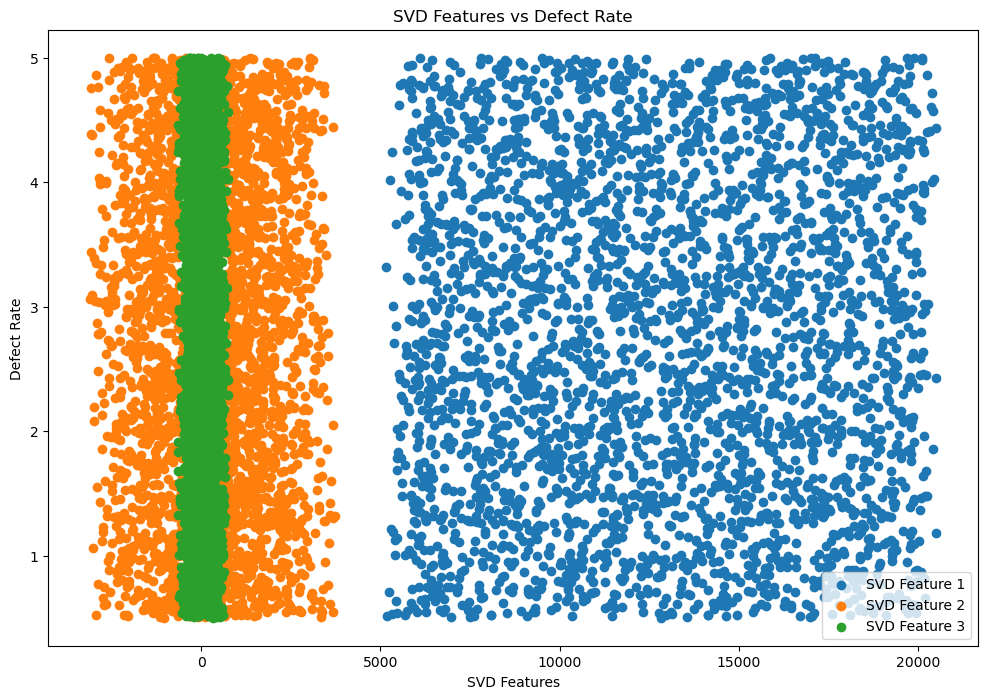

In [5]:
# Unsupervised Learning - SVD
# Apply SVD
svd = TruncatedSVD(n_components=3, random_state=42)
svd_features = svd.fit_transform(data.drop('DefectStatus', axis=1))

# Adding the SVD features to the original dataframe
for i in range(svd_features.shape[1]):
    data[f'SVD_Feature_{i+1}'] = svd_features[:, i]

# Use the SVD features for clustering
kmeans_svd = KMeans(n_clusters=2, random_state=42)
data['SVD_Cluster'] = kmeans_svd.fit_predict(svd_features)

# Mapping clusters to defect status
cluster_defect_mapping = {}
for cluster in np.unique(data['SVD_Cluster']):
    most_common_defect_status = mode(data[data['SVD_Cluster'] == cluster]['DefectStatus'])[0][0]
    cluster_defect_mapping[cluster] = most_common_defect_status

# Predict defect status based on clusters
data['SVD_Predicted_DefectStatus'] = data['SVD_Cluster'].map(cluster_defect_mapping)

# Calculate accuracy
svd_accuracy = accuracy_score(data['DefectStatus'], data['SVD_Predicted_DefectStatus'])
print(f"SVD Method Accuracy: {svd_accuracy}")

# Visualize the SVD features
plt.figure(figsize=(12, 8))
for i in range(svd_features.shape[1]):
    plt.scatter(data[f'SVD_Feature_{i+1}'], data['DefectRate'], label=f'SVD Feature {i+1}')
plt.xlabel('SVD Features')
plt.ylabel('Defect Rate')
plt.legend()
plt.title('SVD Features vs Defect Rate')
plt.show()

C:\Users\Cecile\anaconda3\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
C:\Users\Cecile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Cecile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=13.
  warnings.warn(
C:\Users\Cecile\AppData\Local\Temp\ipykernel_81780\4029315521.py:19: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, thi

NMF Method Accuracy: 0.8404320987654321


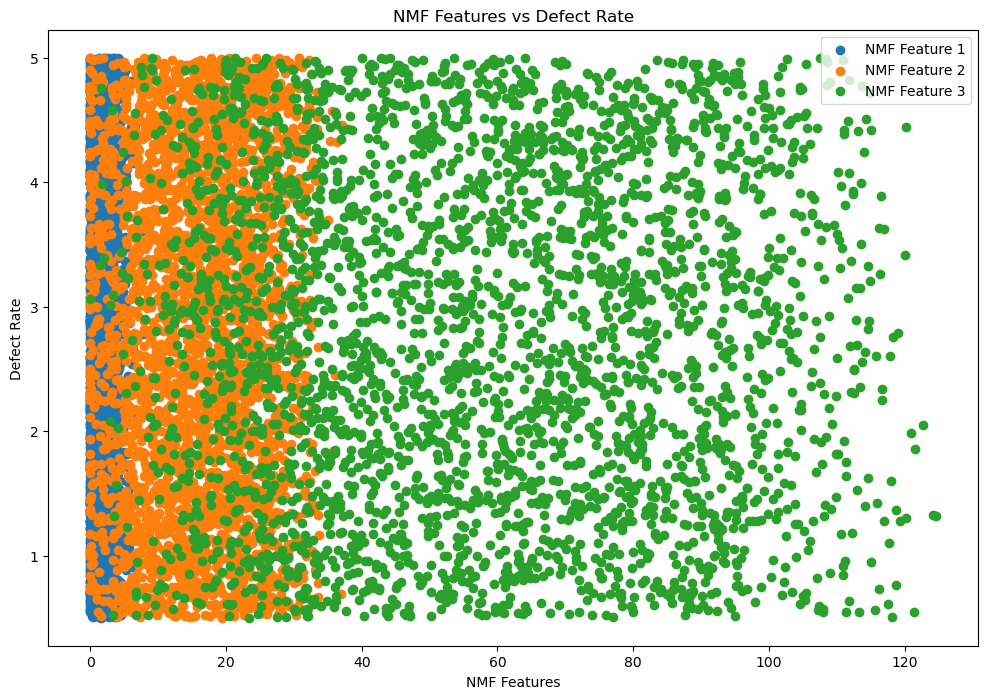

In [6]:
data = pd.read_csv("manufacturing_defect_dataset.csv")

# Apply NMF
nmf = NMF(n_components=3, init='random', random_state=42)
W = nmf.fit_transform(data.drop('DefectStatus', axis=1))
H = nmf.components_

# Adding the NMF features to the original dataframe
for i in range(W.shape[1]):
    data[f'NMF_Feature_{i+1}'] = W[:, i]

# Use the NMF features for clustering
kmeans_nmf = KMeans(n_clusters=3, random_state=42)
data['NMF_Cluster'] = kmeans_nmf.fit_predict(W)

# Mapping clusters to defect status
cluster_defect_mapping = {}
for cluster in np.unique(data['NMF_Cluster']):
    most_common_defect_status = mode(data[data['NMF_Cluster'] == cluster]['DefectStatus'])[0][0]
    cluster_defect_mapping[cluster] = most_common_defect_status

# Predict defect status based on clusters
data['NMF_Predicted_DefectStatus'] = data['NMF_Cluster'].map(cluster_defect_mapping)

# Calculate accuracy
nmf_accuracy = accuracy_score(data['DefectStatus'], data['NMF_Predicted_DefectStatus'])
print(f"NMF Method Accuracy: {nmf_accuracy}")

# Visualize the NMF features
plt.figure(figsize=(12, 8))
for i in range(W.shape[1]):
    plt.scatter(data[f'NMF_Feature_{i+1}'], data['DefectRate'], label=f'NMF Feature {i+1}')
plt.xlabel('NMF Features')
plt.ylabel('Defect Rate')
plt.legend()
plt.title('NMF Features vs Defect Rate')
plt.show()

# 4. Supervised Learning
In this section, I will build and train supervised learning models to predict defect status. The models include Logistic Regression, Decision Trees, and Random Forests. Similarly, I will execute accuracy for each supervised learning method to compare with the unsupervised learning methods to discover if unsupervised learning method is suitable for this dataset.

In [7]:
# Supervised Learning
# Split the data
X = data.drop('DefectStatus', axis=1)
y = data['DefectStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")

# Decision Tree
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)
y_pred_dec_tree = dec_tree.predict(X_test)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred_dec_tree)}")

# Random Forest
rand_forest = RandomForestClassifier()
rand_forest.fit(X_train, y_train)
y_pred_rand_forest = rand_forest.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rand_forest)}")


C:\Users\Cecile\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.8549382716049383
Decision Tree Accuracy: 0.9135802469135802
Random Forest Accuracy: 0.9552469135802469


# 5. Discussion
Unsupervised techniques using SVD and NMF both achieved an accuracy of 84.04% when clustering and mapping to defect status. This shows that the unsupervised techniques can effectively identifying patterns and groupings within the data. However, supervised learning showed higher accuracies on average. For supervised learning, Logistic Regression achieved an accuracy of 85.49%, Decision Trees 89.81%, and Random Forests 95.52%. The superior performance of the Random Forest model demonstrates its robustness and high predictive power for defect status.

# 6. Conclusion
Overall, the combination of these methods effectively captured the underlying structure and relationships in the data. The high accuracy of the Random Forest model suggests it is highly suitable for real-world applications in manufacturing quality control, offering potential for significant improvements in efficiency and cost savings. Future work could explore more advanced techniques and additional features to further enhance predictive performance.